In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install eli5

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from numpy import mean, std
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.8 MB/s 
     |████████████████████████████████| 133 kB 51.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=27d85fcee09d343d77750f098a237b9e85fcb81895790f0f075f4326b176d990
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
final_df = pd.read_excel("/content/drive/MyDrive/AdaBoost/Dataset.xlsx")
final_df.head()

,NIM,NAMA,PRODI,FAKULTAS,KELOMPOK UJIAN,S1,S2,S3,S4,S5,S6,SKS_S1,SKS_S2,SKS_S3,SKS_S4,SKS_S5,SKS_S6,STATUS
0,1101617001,RACHMAT HIDAYAT,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.51,3.639130,3.595833,3.504545,3.6000,3.652381,22.0,45.0,69.0,91.0,115.0,136.0,1
1,1101617002,ARIF BUDI SANTOSO,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.65,3.756522,3.645833,3.704545,3.6750,3.971429,22.0,45.0,69.0,91.0,115.0,136.0,1
2,1101617003,NURUL HISNA HERYANTO,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.53,3.569565,3.554167,3.759091,3.3750,3.617391,22.0,45.0,69.0,91.0,115.0,138.0,1
3,1101617004,ALDINO RAMADHAN,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.68,3.717391,3.370833,3.890909,3.7250,3.733333,22.0,45.0,69.0,91.0,115.0,136.0,1
4,1101617005,MUHAMMAD AZHAR THIFAL,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.68,3.739130,3.687500,3.822727,3.5875,3.882609,22.0,45.0,69.0,91.0,115.0,138.0,1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8295 entries, 0 to 8294
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NIM             8295 non-null   int64  
 1   NAMA            8295 non-null   object 
 2   PRODI           8295 non-null   object 
 3   FAKULTAS        8295 non-null   object 
 4   KELOMPOK UJIAN  8295 non-null   object 
 5   S1              8295 non-null   float64
 6   S2              8295 non-null   float64
 7   S3              8295 non-null   float64
 8   S4              8295 non-null   float64
 9   S5              8295 non-null   float64
 10  S6              8295 non-null   float64
 11  SKS_S1          8295 non-null   float64
 12  SKS_S2          8295 non-null   float64
 13  SKS_S3          8295 non-null   float64
 14  SKS_S4          8295 non-null   float64
 15  SKS_S5          8295 non-null   float64
 16  SKS_S6          8295 non-null   float64
 17  STATUS          8295 non-null   i

In [ ]:
final_df["NIM"] = final_df["NIM"].astype('str')
final_df["STATUS"] = final_df["STATUS"].astype('str')

In [ ]:
final_df.describe()

,S1,S2,S3,S4,S5,S6,SKS_S1,SKS_S2,SKS_S3,SKS_S4,SKS_S5,SKS_S6
count,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000
mean,3.471486,3.503894,3.493651,3.518129,3.531192,3.635053,20.628451,42.638336,64.829777,87.027486,109.094997,130.188788
std,0.243769,0.240872,0.253280,0.258702,0.270658,0.228191,1.313197,2.813061,4.321893,5.902815,7.601013,9.181412
min,2.470000,2.211111,2.000000,2.226667,2.000000,2.000000,17.000000,34.000000,37.000000,41.000000,45.000000,47.000000
25%,3.310000,3.358333,3.347826,3.370000,3.377273,3.513636,20.000000,41.000000,63.000000,84.000000,106.000000,127.000000
50%,3.500000,3.536364,3.533333,3.565217,3.583333,3.678261,21.000000,44.000000,66.000000,89.000000,111.000000,132.000000
75%,3.660000,3.686957,3.677525,3.709307,3.734783,3.800000,22.000000,45.000000,68.000000,91.000000,115.000000,136.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000,46.000000,71.000000,94.000000,119.000000,142.000000


In [ ]:
final_df.describe(include=[object])

,NIM,NAMA,PRODI,FAKULTAS,KELOMPOK UJIAN,STATUS
count,8295,8295,8295,8295,8295,8295
unique,8295,8247,54,8,2,2
top,1101617001,NURUL AZIZAH,11076-Pendidikan Guru Sekolah Dasar,Fakultas Ilmu Pendidikan,SOSHUM,0
freq,1,4,509,1607,6586,4165


In [ ]:
final_df['STATUS'].value_counts()

0    4165
1    4130
Name: STATUS, dtype: int64

In [ ]:
IPS = pd.DataFrame({'S1': final_df['S1'],'S2': final_df['S2'],'S3': final_df['S3'],'S4': final_df['S4'],'S5': final_df['S5'],'S6': final_df['S6']})
IPS.head()

,S1,S2,S3,S4,S5,S6
0,3.51,3.639130,3.595833,3.504545,3.6000,3.652381
1,3.65,3.756522,3.645833,3.704545,3.6750,3.971429
2,3.53,3.569565,3.554167,3.759091,3.3750,3.617391
3,3.68,3.717391,3.370833,3.890909,3.7250,3.733333
4,3.68,3.739130,3.687500,3.822727,3.5875,3.882609


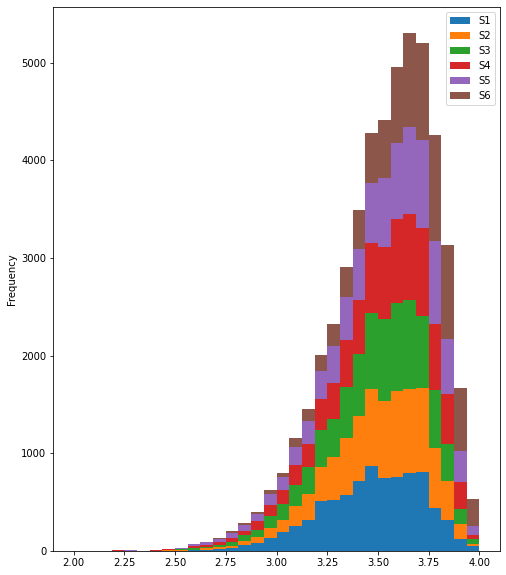

In [ ]:
IPS.plot.hist(figsize=(8, 10), bins=32, stacked="True")

**MODEL 1 (Smt 1)**

In [ ]:
feature_columns1 = ['S1','SKS_S1']
X1 = final_df[feature_columns1]
y1 = final_df['STATUS']

In [ ]:
cv = KFold(n_splits=10, random_state=35, shuffle=True)

In [ ]:
model11 = AdaBoostClassifier()
scores11 = cross_val_score(model11, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores11), std(scores11)))

Accuracy: 0.580 (0.016)


In [ ]:
scores11

array([0.55180723, 0.58554217, 0.56024096, 0.56144578, 0.58433735,
       0.60193004, 0.58986731, 0.59710495, 0.59107358, 0.57901086])

In [ ]:
model12 = DecisionTreeClassifier()
scores12 = cross_val_score(model12, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores12), std(scores12)))

Accuracy: 0.554 (0.012)


In [ ]:
scores12

array([0.53373494, 0.53975904, 0.55060241, 0.55421687, 0.55060241,
       0.57539204, 0.5548854 , 0.5464415 , 0.57297949, 0.56091677])

In [ ]:
model13 = RandomForestClassifier()
scores13 = cross_val_score(model13, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores13), std(scores13)))

Accuracy: 0.550 (0.009)


In [ ]:
scores13

array([0.53614458, 0.53975904, 0.54337349, 0.55180723, 0.54578313,
       0.5681544 , 0.54885404, 0.54885404, 0.56332931, 0.5548854 ])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

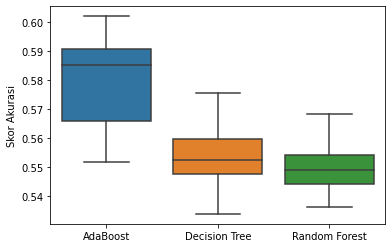

In [ ]:
scores1 = [scores11, scores12, scores13]
sns.boxplot(data=scores1).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

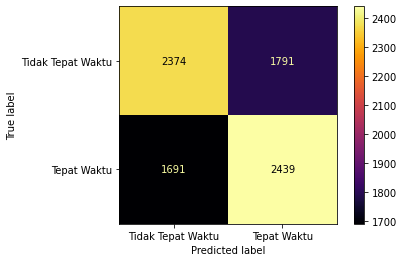

In [ ]:
y_pred11 = cross_val_predict(model11, X1, y1, cv=cv)
cm_display = ConfusionMatrixDisplay.from_predictions(y1, y_pred11, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report11 = classification_report(y1, y_pred11)
print(report11)

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      4165
           1       0.58      0.59      0.58      4130

    accuracy                           0.58      8295
   macro avg       0.58      0.58      0.58      8295
weighted avg       0.58      0.58      0.58      8295



In [ ]:
y_pred12 = cross_val_predict(model12, X1, y1, cv=cv)
report12 = classification_report(y1, y_pred12)
print(report12)

              precision    recall  f1-score   support

           0       0.55      0.60      0.57      4165
           1       0.56      0.51      0.53      4130

    accuracy                           0.55      8295
   macro avg       0.55      0.55      0.55      8295
weighted avg       0.55      0.55      0.55      8295



In [ ]:
y_pred13 = cross_val_predict(model13, X1, y1, cv=cv)
report13 = classification_report(y1, y_pred13)
print(report13)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      4165
           1       0.55      0.54      0.54      4130

    accuracy                           0.55      8295
   macro avg       0.55      0.55      0.55      8295
weighted avg       0.55      0.55      0.55      8295



**MODEL 2 (Smt 2)**

In [ ]:
feature_columns2 = ['S1','S2','SKS_S2']
X2 = final_df[feature_columns2]
y2 = final_df['STATUS']

In [ ]:
model21 = AdaBoostClassifier()
scores21 = cross_val_score(model21, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores21), std(scores21)))

Accuracy: 0.584 (0.020)


In [ ]:
scores21

array([0.57108434, 0.57590361, 0.57349398, 0.56024096, 0.63373494,
       0.58504222, 0.60193004, 0.57659831, 0.59227986, 0.56936068])

In [ ]:
model22 = DecisionTreeClassifier()
scores22 = cross_val_score(model22, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores22), std(scores22)))

Accuracy: 0.539 (0.017)


In [ ]:
scores22

array([0.52289157, 0.51445783, 0.55542169, 0.56626506, 0.51325301,
       0.53437877, 0.54041013, 0.54885404, 0.54041013, 0.55126659])

In [ ]:
model23 = RandomForestClassifier()
scores23 = cross_val_score(model23, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores23), std(scores23)))

Accuracy: 0.552 (0.015)


In [ ]:
scores23

array([0.55903614, 0.56987952, 0.56385542, 0.5253012 , 0.53253012,
       0.55247286, 0.56332931, 0.53075995, 0.5548854 , 0.56453559])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

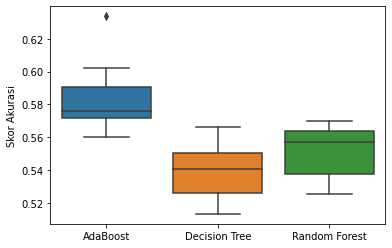

In [ ]:
scores2 = [scores21, scores22, scores23]
sns.boxplot(data=scores2).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

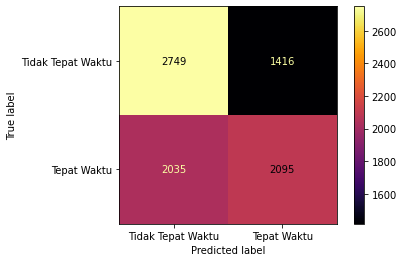

In [ ]:
y_pred21 = cross_val_predict(model21, X2, y2, cv=cv)
cm_display = ConfusionMatrixDisplay.from_predictions(y2, y_pred21, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report21 = classification_report(y2, y_pred21)
print(report21)

              precision    recall  f1-score   support

           0       0.57      0.66      0.61      4165
           1       0.60      0.51      0.55      4130

    accuracy                           0.58      8295
   macro avg       0.59      0.58      0.58      8295
weighted avg       0.59      0.58      0.58      8295



In [ ]:
y_pred22 = cross_val_predict(model22, X2, y2, cv=cv)
report22 = classification_report(y2, y_pred22)
print(report22)

              precision    recall  f1-score   support

           0       0.54      0.55      0.54      4165
           1       0.53      0.52      0.53      4130

    accuracy                           0.53      8295
   macro avg       0.53      0.53      0.53      8295
weighted avg       0.53      0.53      0.53      8295



In [ ]:
y_pred23 = cross_val_predict(model23, X2, y2, cv=cv)
report23 = classification_report(y2, y_pred23)
print(report23)

              precision    recall  f1-score   support

           0       0.56      0.57      0.56      4165
           1       0.56      0.54      0.55      4130

    accuracy                           0.56      8295
   macro avg       0.56      0.56      0.56      8295
weighted avg       0.56      0.56      0.56      8295



**MODEL 3 (Smt 3)**

In [ ]:
feature_columns3 = ['S1','S2','S3','SKS_S3']
X3 = final_df[feature_columns3]
y3 = final_df['STATUS']

In [ ]:
model31 = AdaBoostClassifier()
scores31 = cross_val_score(model31, X3, y3, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores31), std(scores31)))

Accuracy: 0.596 (0.017)


In [ ]:
scores31

array([0.59156627, 0.60361446, 0.55903614, 0.58313253, 0.62048193,
       0.59348613, 0.58504222, 0.60072376, 0.62243667, 0.59710495])

In [ ]:
model32 = DecisionTreeClassifier()
scores32 = cross_val_score(model32, X3, y3, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores32), std(scores32)))

Accuracy: 0.552 (0.015)


In [ ]:
scores32

array([0.54096386, 0.57108434, 0.5373494 , 0.57831325, 0.54096386,
       0.53558504, 0.5681544 , 0.54402895, 0.55006031, 0.55126659])

In [ ]:
model33 = RandomForestClassifier()
scores33 = cross_val_score(model33, X3, y3, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores33), std(scores33)))

Accuracy: 0.586 (0.015)


In [ ]:
scores33

array([0.57831325, 0.6060241 , 0.57590361, 0.59759036, 0.58795181,
       0.55971049, 0.57297949, 0.59951749, 0.57659831, 0.6079614 ])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

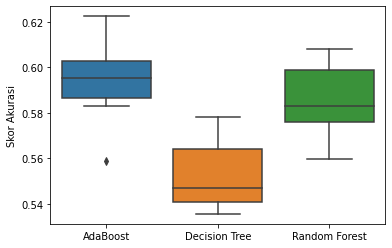

In [ ]:
scores3 = [scores31, scores32, scores33]
sns.boxplot(data=scores3).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

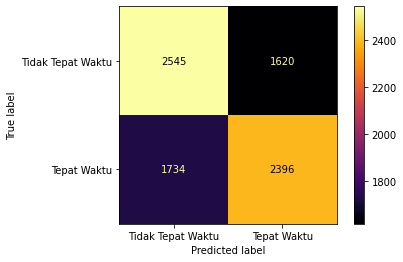

In [ ]:
y_pred31 = cross_val_predict(model31, X3, y3, cv=cv)
cm_display = ConfusionMatrixDisplay.from_predictions(y3, y_pred31, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report31 = classification_report(y3, y_pred31)
print(report31)

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      4165
           1       0.60      0.58      0.59      4130

    accuracy                           0.60      8295
   macro avg       0.60      0.60      0.60      8295
weighted avg       0.60      0.60      0.60      8295



In [ ]:
y_pred32 = cross_val_predict(model32, X3, y3, cv=cv)
report32 = classification_report(y3, y_pred32)
print(report32)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      4165
           1       0.55      0.56      0.55      4130

    accuracy                           0.55      8295
   macro avg       0.55      0.55      0.55      8295
weighted avg       0.55      0.55      0.55      8295



In [ ]:
y_pred33 = cross_val_predict(model33, X3, y3, cv=cv)
report33 = classification_report(y3, y_pred33)
print(report33)

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      4165
           1       0.59      0.57      0.58      4130

    accuracy                           0.59      8295
   macro avg       0.59      0.59      0.59      8295
weighted avg       0.59      0.59      0.59      8295



**MODEL 4 (Smt 4)**

In [ ]:
feature_columns4 = ['S1','S2','S3','S4','SKS_S4']
X4 = final_df[feature_columns4]
y4 = final_df['STATUS']

In [ ]:
model41 = AdaBoostClassifier()
scores41 = cross_val_score(model41, X4, y4, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores41), std(scores41)))

Accuracy: 0.610 (0.013)


In [ ]:
scores41

array([0.61084337, 0.59759036, 0.57831325, 0.61445783, 0.61204819,
       0.61640531, 0.61158022, 0.60916767, 0.62726176, 0.61881785])

In [ ]:
model42 = DecisionTreeClassifier()
scores42 = cross_val_score(model42, X4, y4, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores42), std(scores42)))

Accuracy: 0.552 (0.018)


In [ ]:
scores42

array([0.56506024, 0.55180723, 0.53012048, 0.55180723, 0.5686747 ,
       0.56574186, 0.54161641, 0.54161641, 0.5199035 , 0.5814234 ])

In [ ]:
model43 = RandomForestClassifier()
scores43 = cross_val_score(model43, X4, y4, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores43), std(scores43)))

Accuracy: 0.604 (0.023)


In [ ]:
scores43

array([0.59036145, 0.60120482, 0.58433735, 0.60240964, 0.5939759 ,
       0.61881785, 0.59107358, 0.62967431, 0.57297949, 0.6562123 ])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

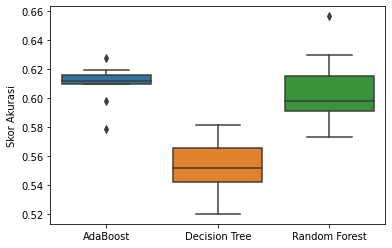

In [ ]:
scores4 = [scores41, scores42, scores43]
sns.boxplot(data=scores4).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

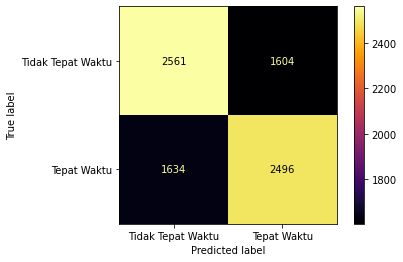

In [ ]:
y_pred41 = cross_val_predict(model41, X4, y4, cv=cv)
cm_display = ConfusionMatrixDisplay.from_predictions(y4, y_pred41, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report41 = classification_report(y4, y_pred41)
print(report41)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      4165
           1       0.61      0.60      0.61      4130

    accuracy                           0.61      8295
   macro avg       0.61      0.61      0.61      8295
weighted avg       0.61      0.61      0.61      8295



In [ ]:
y_pred42 = cross_val_predict(model42, X4, y4, cv=cv)
report42 = classification_report(y4, y_pred42)
print(report42)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      4165
           1       0.55      0.55      0.55      4130

    accuracy                           0.55      8295
   macro avg       0.55      0.55      0.55      8295
weighted avg       0.55      0.55      0.55      8295



In [ ]:
y_pred43 = cross_val_predict(model43, X4, y4, cv=cv)
report43 = classification_report(y4, y_pred43)
print(report43)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      4165
           1       0.60      0.58      0.59      4130

    accuracy                           0.60      8295
   macro avg       0.60      0.60      0.60      8295
weighted avg       0.60      0.60      0.60      8295



**MODEL 5 (Smt 5)**

In [ ]:
feature_columns5 = ['S1','S2','S3','S4','S5','SKS_S5']
X5 = final_df[feature_columns5]
y5 = final_df['STATUS']

In [ ]:
model51 = AdaBoostClassifier()
scores51 = cross_val_score(model51, X5, y5, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores51), std(scores51)))

Accuracy: 0.608 (0.015)


In [ ]:
scores51

array([0.62771084, 0.59518072, 0.5939759 , 0.62409639, 0.60963855,
       0.60193004, 0.58866104, 0.59951749, 0.60916767, 0.6344994 ])

In [ ]:
model52 = DecisionTreeClassifier()
scores52 = cross_val_score(model52, X5, y5, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores52), std(scores52)))

Accuracy: 0.571 (0.014)


In [ ]:
scores52

array([0.55421687, 0.5686747 , 0.54337349, 0.5686747 , 0.57228916,
       0.58986731, 0.58624849, 0.59107358, 0.56574186, 0.56936068])

In [ ]:
model53 = RandomForestClassifier()
scores53 = cross_val_score(model53, X5, y5, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores53), std(scores53)))

Accuracy: 0.623 (0.013)


In [ ]:
scores53

array([0.6       , 0.61807229, 0.60722892, 0.61927711, 0.6313253 ,
       0.62605549, 0.62846803, 0.64294331, 0.61881785, 0.64053076])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

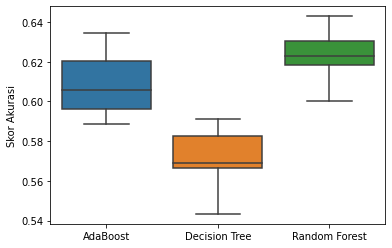

In [ ]:
scores5 = [scores51, scores52, scores53]
sns.boxplot(data=scores5).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

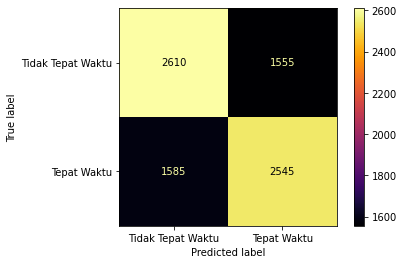

In [ ]:
y_pred53 = cross_val_predict(model53, X5, y5, cv=cv)
cm_display = ConfusionMatrixDisplay.from_predictions(y5, y_pred53, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report53 = classification_report(y5, y_pred53)
print(report53)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      4165
           1       0.62      0.62      0.62      4130

    accuracy                           0.62      8295
   macro avg       0.62      0.62      0.62      8295
weighted avg       0.62      0.62      0.62      8295



In [ ]:
y_pred51 = cross_val_predict(model51, X5, y5, cv=cv)
report51 = classification_report(y5, y_pred51)
print(report51)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      4165
           1       0.61      0.61      0.61      4130

    accuracy                           0.61      8295
   macro avg       0.61      0.61      0.61      8295
weighted avg       0.61      0.61      0.61      8295



In [ ]:
y_pred52 = cross_val_predict(model52, X5, y5, cv=cv)
report52 = classification_report(y5, y_pred52)
print(report52)

              precision    recall  f1-score   support

           0       0.57      0.58      0.58      4165
           1       0.57      0.57      0.57      4130

    accuracy                           0.57      8295
   macro avg       0.57      0.57      0.57      8295
weighted avg       0.57      0.57      0.57      8295



**MODEL 6 (Smt 6)**

In [ ]:
feature_columns6 = ['S1','S2','S3','S4','S5','S6','SKS_S6']
X6 = final_df[feature_columns6]
y6 = final_df['STATUS']

In [ ]:
model61 = AdaBoostClassifier()
scores61 = cross_val_score(model61, X6, y6, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores61), std(scores61)))

Accuracy: 0.633 (0.013)


In [ ]:
scores61

array([0.6373494 , 0.62650602, 0.63493976, 0.62650602, 0.62771084,
       0.62002413, 0.60916767, 0.65379976, 0.64414958, 0.65259349])

In [ ]:
model62 = DecisionTreeClassifier()
scores62 = cross_val_score(model62, X6, y6, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores62), std(scores62)))

Accuracy: 0.582 (0.015)


In [ ]:
scores62

array([0.56626506, 0.59879518, 0.58313253, 0.59638554, 0.54939759,
       0.60072376, 0.57056695, 0.58866104, 0.58383595, 0.58624849])

In [ ]:
model63 = RandomForestClassifier()
scores63 = cross_val_score(model63, X6, y6, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores63), std(scores63)))

Accuracy: 0.649 (0.015)


In [ ]:
scores63

array([0.63012048, 0.64578313, 0.63012048, 0.65421687, 0.6373494 ,
       0.65379976, 0.64173703, 0.67792521, 0.6477684 , 0.67310012])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

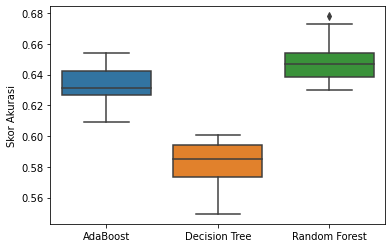

In [ ]:
scores6 = [scores61, scores62, scores63]
sns.boxplot(data=scores6).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

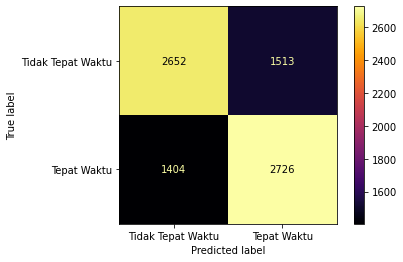

In [ ]:
y_pred63 = cross_val_predict(model63, X6, y6, cv=cv)
cm_display = ConfusionMatrixDisplay.from_predictions(y6, y_pred63, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report63 = classification_report(y6, y_pred63)
print(report63)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      4165
           1       0.64      0.66      0.65      4130

    accuracy                           0.65      8295
   macro avg       0.65      0.65      0.65      8295
weighted avg       0.65      0.65      0.65      8295



In [ ]:
y_pred61 = cross_val_predict(model61, X6, y6, cv=cv)
report61 = classification_report(y6, y_pred61)
print(report61)

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      4165
           1       0.62      0.67      0.64      4130

    accuracy                           0.63      8295
   macro avg       0.63      0.63      0.63      8295
weighted avg       0.63      0.63      0.63      8295



In [ ]:
y_pred62 = cross_val_predict(model62, X6, y6, cv=cv)
report62 = classification_report(y6, y_pred62)
print(report62)

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      4165
           1       0.58      0.57      0.58      4130

    accuracy                           0.58      8295
   macro avg       0.58      0.58      0.58      8295
weighted avg       0.58      0.58      0.58      8295



In [ ]:
perm1 = PermutationImportance(model61, random_state=35, cv=cv).fit(X6, y6)
eli5.show_weights(perm1, feature_names = X6.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ad

Weight,Feature
0.0605 ± 0.0398,SKS_S6
0.0396 ± 0.0341,S6
0.0075 ± 0.0176,S5
0.0043 ± 0.0215,S4
0.0041 ± 0.0182,S1
0.0020 ± 0.0218,S2
0.0017 ± 0.0217,S3


In [ ]:
perm2 = PermutationImportance(model62, random_state=35, cv=cv).fit(X6, y6)
eli5.show_weights(perm2, feature_names = X6.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Weight,Feature
0.0557 ± 0.0400,SKS_S6
0.0213 ± 0.0372,S6
0.0097 ± 0.0315,S4
0.0095 ± 0.0324,S5
0.0083 ± 0.0405,S2
0.0078 ± 0.0301,S1
0.0057 ± 0.0333,S3


In [ ]:
perm3 = PermutationImportance(model63, random_state=35, cv=cv).fit(X6, y6)
eli5.show_weights(perm3, feature_names = X6.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Weight,Feature
0.0790 ± 0.0298,SKS_S6
0.0437 ± 0.0346,S6
0.0183 ± 0.0241,S3
0.0172 ± 0.0275,S4
0.0161 ± 0.0274,S5
0.0137 ± 0.0238,S2
0.0094 ± 0.0256,S1
